In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
mall_data = pd.read_csv('Mall_customers.csv')
mall_data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [9]:
mall_data.shape

(200, 5)

In [53]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
mall_data.describe().head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522


In [12]:
mall_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

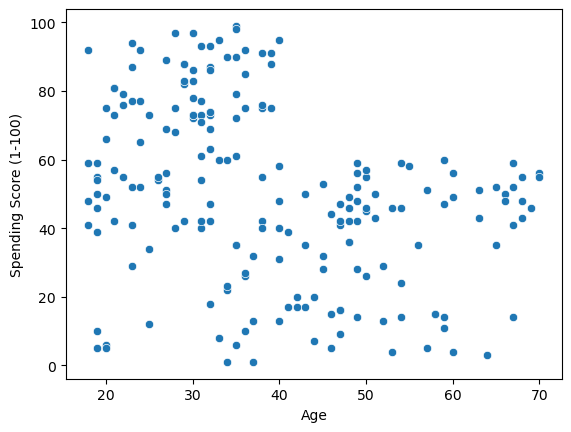

In [15]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=mall_data,legend= 'full')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

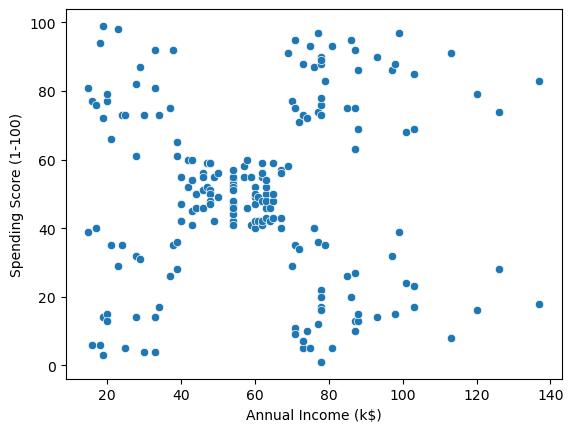

In [16]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data,legend= 'full')

In [19]:
from sklearn.cluster import KMeans
X_numerics = mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [21]:
X_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [23]:
!pip install yellowbrick

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

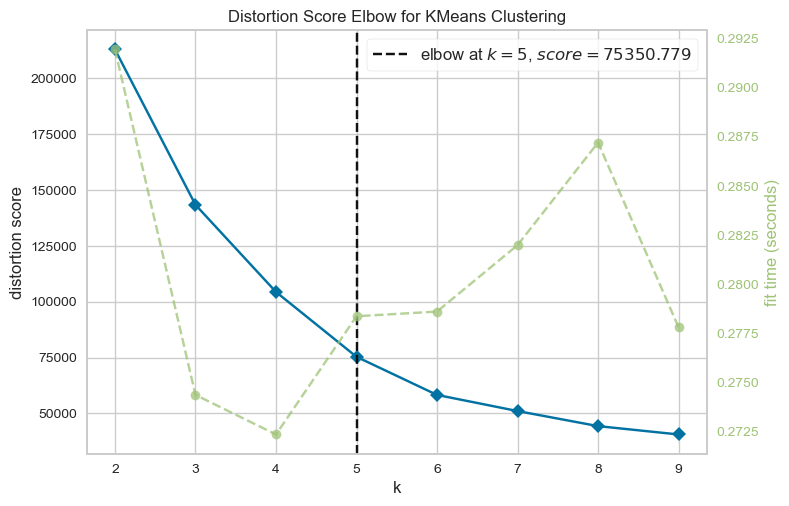

In [25]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model , k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [32]:
KM_5_clusters = KMeans(n_clusters = 5 , init = 'k-means++').fit(X_numerics)

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'cluster'] = KM_5_clusters.labels_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
KM5_clustered

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

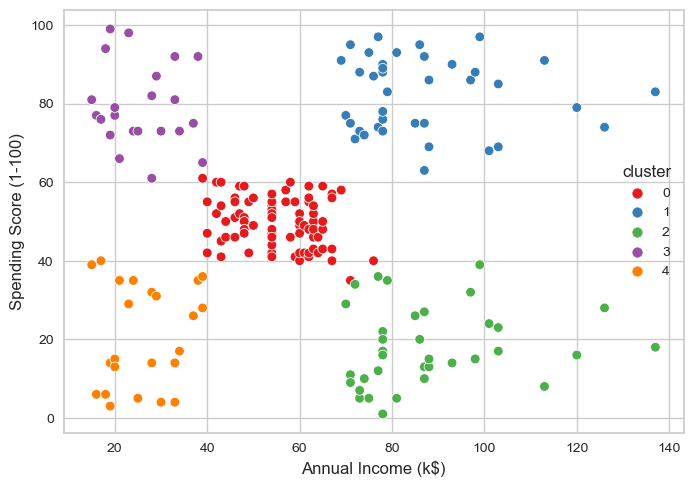

In [39]:
sns.scatterplot(x='Annual Income (k$)',
               y='Spending Score (1-100)',
               data = KM5_clustered,
               hue = 'cluster',palette='Set1',
               legend='full')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

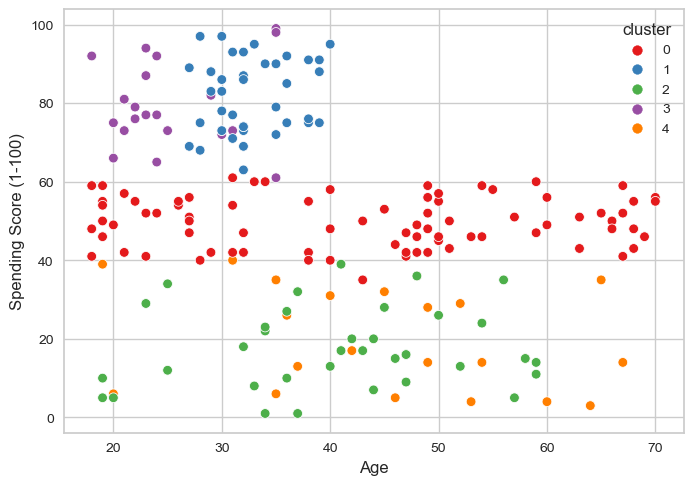

In [42]:
sns.scatterplot(x='Age',
               y='Spending Score (1-100)',
               data = KM5_clustered,
               hue = 'cluster',palette='Set1',
               legend='full')

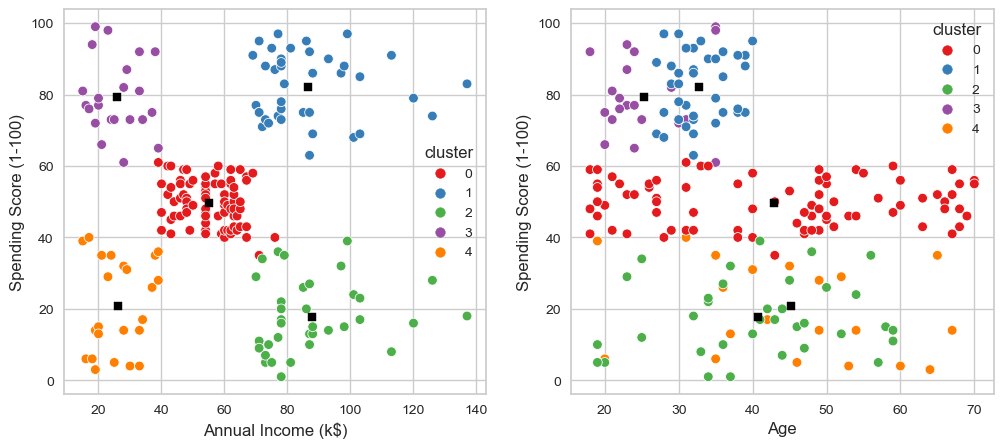

In [51]:
fig1, axes = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)',
               y='Spending Score (1-100)',
               data = KM5_clustered,
                ax=axes[0],
               hue = 'cluster',palette='Set1',
               legend='full')

sns.scatterplot(x='Age',
               y='Spending Score (1-100)',
               data = KM5_clustered,
                ax=axes[1],
               hue = 'cluster',palette='Set1',
               legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2],marker='s',s=40,c="black")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2],marker='s',s=40,c="black")